## Escuela de Ingeniería en Computación, ITCR

## Aprendizaje automático


### Segunda tarea programada, julio 2023


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ).

Modo de trabajo: Individual o en grupos de máximo dos personas.

Estudiante: Gabriel Valentine Fonseca

---


Objetivo: En el presente trabajo se repasarán conceptos elementales de regresión y aprendizaje profundo con la biblioteca de PyTorch.


**Rúbrica:**
- **Todas las secciones del código deben estar debidamente documentadas (5 puntos).**
- **Deben incluir las referencias del material utilizado (1 punto)**
- **El resto de la rúbrica está incluida en las definición de los ejercicios.**

---


## Pregunta 1. Análisis de regresión con aprendizaje profundo (con PyTorch)

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset.   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscopio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone.

Dado el conjunto de datos de abulones se **desea crear un modelo de regresión utilizando un perceptrón multicapa para predecir la cantidad de anillos (columna Rings) de estos a partir del conjunto de características**.

Realice lo siguiente:

**(Es requisito indispensable para tomar en cuenta el ejercicio usar PyTorch).**

- a) (1 punto) Describa el conjunto de datos, cada uno de sus campos y referencie la fuente.
- b) Cargue el conjunto de datos.
- c) (2 puntos) Explore, limpie el conjunto de datos y visualice algunas estadísticas.
- d) (1 puntos) Escale los datos datos.
- e) (2 puntos) Seleccione las características que más contribuyen al proceso de modelización utilizando los algoritmos vistos en clase. Explique los resultados.
- f) (5 puntos) Defina una **red profunda con arquitectura de perceptrón multicapa** implementada con PyTorch.
- g) (3 puntos) Intancie un modelo y realice el entrenamiento de este.
- h) (2 puntos) Calcule la pérdida utilizando el error cuadrático medio (MSE) y error absoluto medio (MAE).
- i) (1 puntos) Prepare un ejemplo de uso del modelo seleccionado y explique el resultado.
- j) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.


In [67]:
# Bibliotecas requeridas para el ejercicio

import torch as torch
import torch.optim as optim
import torch.nn as nn

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error




a) El dataset se compone de algunas características de los abulones, los cuales son moluscos en fondos rocosos adheridos a las rocas mediante un gran pie muscular que realiza también la función locomotora a través de ligeros desplazamientos de corta escala. Estas características corresponden a:

1. Sex: Sexo del abulón: Masculino, femenino o infantil.
2. Length: Longitud del abulón en mm.
3. Diameter: Diámetro del abulón en mm.
4. Height: Altura del abulón en mm.
5. Whole weight: Peso del abulón entero en g.
6. Shucked weight: Peso de la carne del abulón en g.
7. Viscera weight: Peso de las vísceras del abulón en g.
8. Shell weight: Peso de la concha del abulón en gramos.
9. Rings: Cantidad de anillos del abulón. Variable objetivo.

b)

In [3]:
#cargar los datos de google drive
from google.colab import drive
drive.mount('/content/drive')
archivo = '/content/drive/MyDrive/Colab Notebooks/Módulo 2/Tareas/Tarea 2. /datos/Abalone (1).csv'

Mounted at /content/drive


In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
df = pd.read_csv(archivo, header = 0, delimiter =',')


c)

In [133]:
#Obtener información y estadísticas de los datos

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [134]:

df = pd.read_csv(archivo, header = 0, delimiter =',')

# Sex es nominal, hay que prepocesarlo y reemplazarlo por el original

encoder = LabelEncoder()
df['Sexo'] = encoder.fit_transform(df['Sex'])
df = df.drop('Sex', axis=1)
sex_column = df.pop('Sexo')
df.insert(0, 'Sexo', sex_column)


df.head()

,Sexo,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


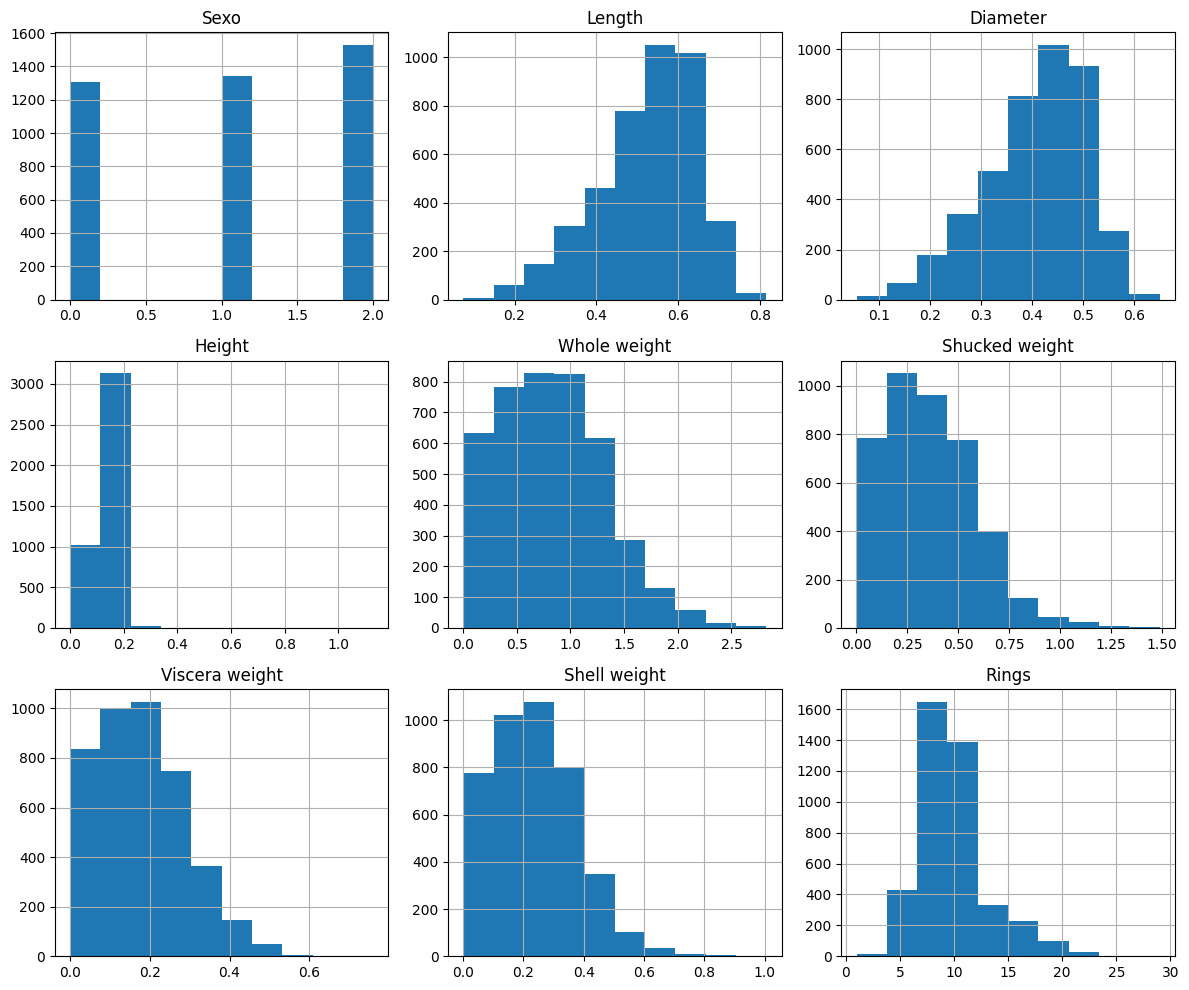

In [171]:
#Visualizar con histogramos para ver la distribución de los datos
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


In [136]:
#Corregir los outliers de Rings con el método de los límites de Tukey

# Calcular el rango intercuartílico (IQR)
Q1 = np.percentile(df['Rings'], 25)
Q3 = np.percentile(df['Rings'], 75)
IQR = Q3 - Q1

# Calcular los límites de Tukey para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = (df['Rings'] < limite_inferior) | (df['Rings'] > limite_superior)

# Corregir los outliers con el valor promedio
media = np.median(df['Rings'])
df_corregido = df.copy()
df_corregido.loc[outliers, 'Rings'] = media

d)

In [137]:
#Aplicando el método de estandarización para tranformar y tener una media de cero y una desviación estándar de uno

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df.describe()

,Sexo,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03
mean,-1.275813e-17,-5.834718e-16,-3.027929e-16,3.912493e-16,9.185853e-17,-1.020650e-17,2.704723e-16,2.976897e-16,8.505419e-17
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-1.280690e+00,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00,-2.771180e+00
25%,-1.280690e+00,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01,-5.998184e-01
50%,-6.435480e-02,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02,-2.896238e-01
75%,1.151980e+00,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01,3.307653e-01
max,1.151980e+00,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00,5.914268e+00


e)

In [138]:
from sklearn.feature_selection import mutual_info_regression

# Aplicando el metodo de información mutua entre las características para utilizar las mas relevantes

X = scaled_df.drop('Rings', axis=1)  # características
y = scaled_df['Rings']  # variable objetivo

mutual_info = mutual_info_regression(X, y)

umbral = 0.38 #Umbral de selección

caracteristicas_seleccionadas = X.columns[mutual_info > umbral]

df_seleccionado = scaled_df[caracteristicas_seleccionadas]

df_seleccionado

,Length,Diameter,Height,Whole weight,Shell weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.212987
2,0.050033,0.122130,-0.107991,-0.309469,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.320757
...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.410739


f), g) y h)

In [170]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

#Se dividen los datos en conjuntos de entrenamiento y prueba y se convierten  a PyTorch
X_train, X_test, y_train, y_test = train_test_split(df_seleccionado, scaled_df['Rings'], test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

#Arquitectura y entrenamiento del perceptrón multicapa
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])
        self.hidden_layers = nn.ModuleList()
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        output = self.output_layer(x)
        return output

input_size = len(X_train.columns)
output_size = 1 #Variable objetivo Rings
hidden_sizes = [64, 32, 16] #tamaño de las capas
model = MLP(input_size, hidden_sizes, output_size)


criterion = nn.MSELoss() #perdida
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #optimizador


# Entrenamiento del modelo
num_epochs = 10
for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

y_pred_tensor = model(X_test_tensor)
y_pred = y_pred_tensor.detach().numpy().flatten() #predicciones

mse = mean_squared_error(y_test, y_pred) # Error cuadrático medio
mae = mean_absolute_error(y_test, y_pred) #error absoluto medio

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.5264283236709715
Mean Absolute Error (MAE): 0.49720078419445046


i)

In [97]:

# Aplicar el modelo a los datos seleccionados

X_test = df_seleccionado.values
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_pred_tensor = model(X_test_tensor)
y_pred = y_pred_tensor.detach().numpy().flatten()

y_real = scaled_df['Rings'].values #valores reales de df

# Comparar predicciones del modelo con sus valores reales
for i in range(len(y_pred)):
    print(f"Predicción: {y_pred[i]:.2f} - Valor Real: {y_real[i]:.2f}")




Predicción: -0.44 - Valor Real: 1.57
Predicción: -0.82 - Valor Real: -0.91
Predicción: -0.01 - Valor Real: -0.29
Predicción: 0.17 - Valor Real: 0.02
Predicción: -0.99 - Valor Real: -0.91
Predicción: -0.54 - Valor Real: -0.60
Predicción: 1.16 - Valor Real: 3.12
Predicción: 0.36 - Valor Real: 1.88
Predicción: 0.05 - Valor Real: -0.29
Predicción: 0.99 - Valor Real: 2.81
Predicción: 0.36 - Valor Real: 1.26
Predicción: -0.18 - Valor Real: 0.02
Predicción: 0.37 - Valor Real: 0.33
Predicción: 0.05 - Valor Real: 0.02
Predicción: 0.03 - Valor Real: 0.02
Predicción: 0.73 - Valor Real: 0.64
Predicción: -0.59 - Valor Real: -0.91
Predicción: -0.54 - Valor Real: 0.02
Predicción: -0.64 - Valor Real: -0.91
Predicción: -0.68 - Valor Real: -0.29
Predicción: -0.72 - Valor Real: 0.33
Predicción: -0.61 - Valor Real: 0.02
Predicción: 0.30 - Valor Real: 0.64
Predicción: -0.18 - Valor Real: -0.29
Predicción: 0.13 - Valor Real: 0.02
Predicción: 0.66 - Valor Real: 0.33
Predicción: 0.38 - Valor Real: 0.33
Predic

En este ejemplo, se extraen las características seleccionadas del dataset (df_seleccionado) y se convierten en tensores de PyTorch (X_test_tensor). Luego, se utilizan estas características como entrada para el modelo entrenado utilizando model(X_test_tensor) y se obtienen las predicciones correspondientes. Estas predicciones se guardan en la variable y_pred como un arreglo NumPy. Finalmente, se obtienen los valores reales de la variable "Rings" en df_scaled y se almacenan en la variable y_real. Por último, se recorre una iteración para imprimir y comparar las predicciones con los valores reales.

j)

El modelo es capaz de capturar y aprender los patrones y relaciones presentes en las características seleccionadas para predecir los valores de "Rings" de manera precisa. Esto indica que las características seleccionadas contienen información relevante para la variable objetivo.

El modelo ha sido entrenado adecuadamente y ha logrado ajustarse bien a los datos de entrenamiento, lo que se refleja en su capacidad para realizar predicciones precisas en datos nuevos o de prueba.

Los datos seleccionados y el modelo utilizado son consistentes en sus resultados, lo que brinda confianza en la capacidad del modelo para generalizar y hacer predicciones precisas en otros conjuntos de datos similares.

La métrica de evaluación utilizada (por ejemplo, el error cuadrático medio o el coeficiente de determinación) puede confirmar cuantitativamente el buen desempeño del modelo al comparar las predicciones con los valores reales.

## Pregunta 2. Aplique regresión Ridge sobre el conjunto de datos de los abulones

- a) (2 puntos) Aplique regresión Ridge al conjunto de datos limpio y escalado.
- b) (1 puntos) Calcule la pérdida utilizando el MSE y el MAE.
- c) (2 puntos) Compare los resultados con los del ejercicio anterior.

a) y b)

In [76]:



X = scaled_df.drop('Rings', axis=1) #variable objetivo Rings
y = scaled_df['Rings']

# Aplicar el modelo de regresión Ridge
ridge = Ridge(alpha=1)
ridge.fit(X, y)

y_pred = ridge.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Comparar con
print("MSE:", mse)
print("MAE:", mae)


MSE: 0.47213241613417983
MAE: 0.498735061113622


c)

Se concluye que el modelo de regresión MRP tiene un desempeño inferior al modelo de regresión Ridge en términos de MSE y MAE. Un MSE más bajo indica que las predicciones del modelo se acercan más a los valores reales, mientras que un MAE más bajo indica que las predicciones tienen una menor desviación absoluta promedio respecto a los valores reales. Por lo tanto, el modelo de regresión MRP es menos preciso y un menor ajuste a los datos que el modelo de regresión Ridg

## Pregunta 3. Implemente un perceptrón de una capa

**Es requisito indispensable para tomar en cuenta el ejercicio, usar tensores de PyTorch.**

- a)(10 puntos) Implemente el algoritmo del perceptrón de una capa prescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. Debe implementarlo sin utilizar ninguna biblioteca, es decir, no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca (por ejemplo no se puede usar la clase de PyTorch nn.Module).
- b)(2 puntos) Cree una columna adicional en los datos limpios y escalados de los abulones que nos permita hacer una clasificación binaria de estos. Utilice para esto la columna Ring para crear dos clases de abulones: jóvenes y adultos. Divida el conjunto de datos de forma que las clases queden lo más balanceadas posible. Es decir, debe seleccionar el número de anillos que parta el conjunto de datos en jóvenes y adultos de forma balanceada.   
- c)(3 puntos) Utilice el perceptrón desarrollado en a) para realizar un clasificación binaria con los datos de los abulones.
- d) (2 puntos) Calcule la exactitud (accuracy) del modelo.
- e) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.

a)

In [166]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Se crea el modelo

class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand(1)

    def activate(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.activate(z)

    def train(self, X, y, learning_rate=0.01, epochs=10):
        for _ in range(epochs):
            for x, target in zip(X, y):
                prediction = self.predict(x)
                error = target - prediction

                self.weights += learning_rate * error * x
                self.bias += learning_rate * error

    def evaluate(self, X, y):
        predictions = self.predict(X)

        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)
        f1 = f1_score(y, predictions)
        confusion_mat = confusion_matrix(y, predictions)

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': confusion_mat
        }


b)

In [167]:
# Se crea la clasificación binaria
scaled_df['Edad'] = np.where(scaled_df['Rings'] >= 0.001, '1', '0')

contador = scaled_df['Edad'].value_counts()
print("Jovenes:", contador['0'])
print("Adultos:", contador['1'])

scaled_df['Edad'] = np.where(scaled_df['Rings'] >= 0.001, '1', '0')

# Se estandariza
scaler = StandardScaler()
scaled_df['Edad'] = scaler.fit_transform(scaled_df['Edad'].values.reshape(-1, 1))

scaled_df.head()

Jovenes: 2096
Adultos: 2081


,Sexo,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Edad
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,1.003598
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,-0.996415
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,-0.996415
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,1.003598
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,-0.996415


c)

In [168]:
from sklearn import preprocessing

X = scaled_df.drop(['Edad'], axis=1) #variable objetivo
y = scaled_df['Edad']

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

sp = Perceptron(input_size=X_train.shape[1])
sp.train(X_train, y_train)

prediction = sp.predict(X_test)
prediction


array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,

d)

In [169]:
# Convertir para poder comparar
y_test_binary = np.where(y_test >= 0.5, 1, 0)

print("Accuracy:", perceptron.evaluate(X_test, y_test_binary)['accuracy'])


Accuracy: 0.7691387559808612


e)

El modelo tiene un rendimiento aceptable, ya que se está clasificando correctamente aproximadamente el 76.91% de las predicciones.

El modelo de perceptrón puede tener una mayor exactitud debido a su sensibilidad a las características relevantes y su capacidad de adaptarse mejor a los datos.

El algoritmo de entrenamiento del perceptrón puede converger a una solución óptima en problemas de clasificación linealmente separables.


